In [71]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)

In [72]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [73]:
mnist['target']

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [74]:
mnist.data[0].shape

(784,)

In [75]:
x,y=mnist.data,mnist.target
print(x.shape)
print(y.shape)

(70000, 784)
(70000,)


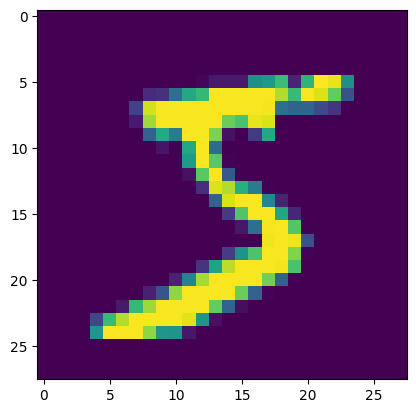

'5'

In [ ]:
import matplotlib.pyplot as plt
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image)
    

some_digit = x[0]
plot_digit(some_digit)
plt.show()
y[0]

In [77]:
X_train, X_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]

In [78]:
# devide the labels like  this to make it binary classification to facilitate the explain
y_train_5 = (y_train == '5')  # True for all 5s, False for all other digits
y_test_5 = (y_test == '5')

## SGDClassifier

In [79]:
# linear model for classification that is trained using Stochastic Gradient Descent (SGD)
from sklearn.linear_model import SGDClassifier 
sgd_clas=SGDClassifier(random_state=42)
sgd_clas.fit(X_train,y_train_5)
sgd_clas.predict([X_train[0]]) # this means the first element of the train set is 5 (true)

array([ True])

In [80]:
# use the crossvalidation to train the model
from sklearn.model_selection import cross_val_score
scores_sgd_cv=cross_val_score(sgd_clas, X_train, y_train_5, cv=3, scoring="accuracy") #this will return 3 scores for the 3 folds
print(scores_sgd_cv.mean())

0.9570333333333334


## DummyClassifier
#####  is a baseline classifier that makes predictions using simple strategies without actually learning from the data 

| Strategy        | Description                                          |
|----------------|------------------------------------------------------|
| "most_frequent" | Always predicts the most common class in `y_train`  |
| "stratified"    | Predicts based on class distribution in `y_train`   |
| "uniform"       | Randomly assigns a class with equal probability     |
| "constant"      | Always predicts a specific class (you provide the value) |


In [81]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train))) ## any return TRUE if get at least one 5 else return FALSE

False


In [82]:
# cross_val_score --> return a list of test scores for each fold (3 scores for 3 folds)
scores_dum_cv=cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")
scores_dum_cv.mean()

0.90965

In [83]:
# cross_val_predict --> returns the predicted labels for all training instances
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clas, X_train, y_train_5, cv=3)

In [84]:
y_train_pred  # return the whole predictions for the training data 

array([ True, False, False, ...,  True, False, False])

In [85]:
y_train_pred.shape

(60000,)

## Confusion Matrix

In [86]:
from sklearn.metrics import confusion_matrix
conM=confusion_matrix(y_train_pred,y_train_5)
print(conM)
print("")
print(conM[0][0])

[[53892  1891]
 [  687  3530]]

53892


#### precision and recall
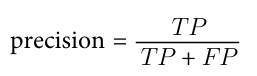
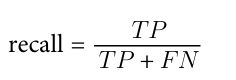

In [87]:
from sklearn.metrics import precision_score ,recall_score
precision=precision_score(y_train_5,y_train_pred)
recall=recall_score(y_train_5,y_train_pred)
print(f'precesion { precision}')
print(f'recall {recall}')

precesion 0.8370879772350012
recall 0.6511713705958311


In [88]:
from sklearn.metrics import classification_report 
print(classification_report(y_train_5.astype(int),y_train_pred.astype(int)))


              precision    recall  f1-score   support

           0       0.97      0.99      0.98     54579
           1       0.84      0.65      0.73      5421

    accuracy                           0.96     60000
   macro avg       0.90      0.82      0.85     60000
weighted avg       0.95      0.96      0.95     60000



## F1 score -> combines recall and precision , ensure that the recall and precsion are close , valid to compare two models
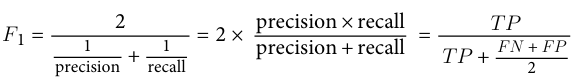

In [89]:
from sklearn.metrics import f1_score
print(f1_score(y_train_5,y_train_pred))

0.7325171197343847


## decision_function

In [90]:
# the  decision_function is the entire method of the sgd_clssifeier to classify data according specific threshold  
"""
you can call its decision_function() method, which returns a
score for each instance, and then use any threshold you want to make predictions
based on those scores
"""
y_scores = sgd_clas.decision_function([some_digit])
y_scores


threshold = 0

y_some_digit_pred = (y_scores > threshold)


In [91]:
y_scores

array([2164.22030239])

In [92]:
y_some_digit_pred


array([ True])

### precision_recall_curve

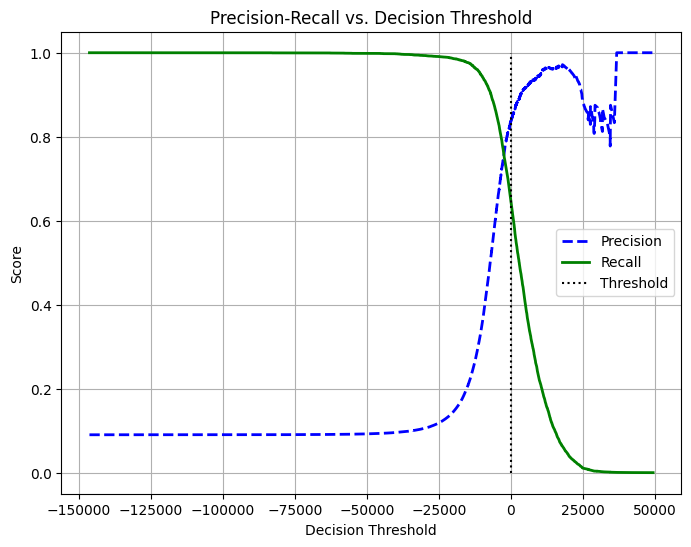

In [93]:
"""
This code analyzes and visualizes the trade-off between precision and recall by 
plotting how they change with different decision thresholds in 
a binary classification problem (detecting the digit '5'). 
"""

from sklearn.metrics import precision_recall_curve

# Get decision scores for all instance of training data using cross-validation
y_scores = cross_val_predict(sgd_clas, X_train, y_train_5, cv=3, method="decision_function")

# Compute precision, recall, and thresholds
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

# Plot Precision-Recall vs. Threshold
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)

# Choose a specific threshold for visualization (example: threshold = 0)
threshold = 0  
plt.vlines(threshold, 0, 1.0, "k", linestyle="dotted", label="Threshold")

# Beautify the figure
plt.xlabel("Decision Threshold")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid(True)
plt.title("Precision-Recall vs. Decision Threshold")

plt.show()



### precision  and recall curve 

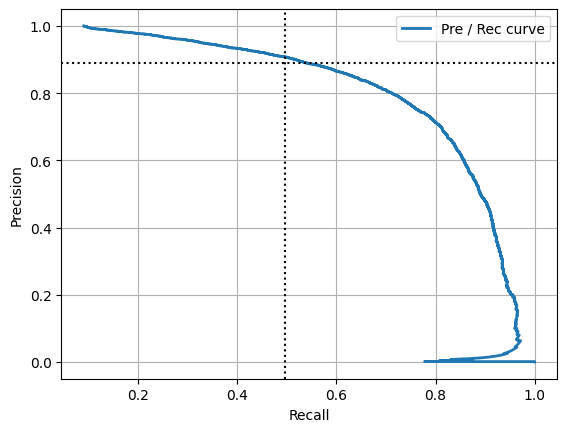

In [94]:
import numpy as np
plt.plot(precisions,recalls,linewidth=2,label='Pre / Rec curve')
# Beautify the figure
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid(True)
threshold_value = 3000  # The chosen threshold
closest_idx = (np.abs(thresholds - threshold_value)).argmin()  # Find the closest index
recall_at_thresh = recalls[closest_idx]  # Get the recall at that index
plt.axvline(x=recall_at_thresh, color='black', linestyle='dotted')
precision_at_thresh = precisions[closest_idx]
plt.axhline(y=precision_at_thresh, color='black', linestyle='dotted')

plt.show()


### to get the threshold using another method


In [95]:
idx_for_90_precision = (precisions >= 0.90).argmax() #The .argmax() returns the index of the first maximum value (or first True value in a boolean array).
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

3370.0194991439557

## Receiver Operating Characteristic ROC curve

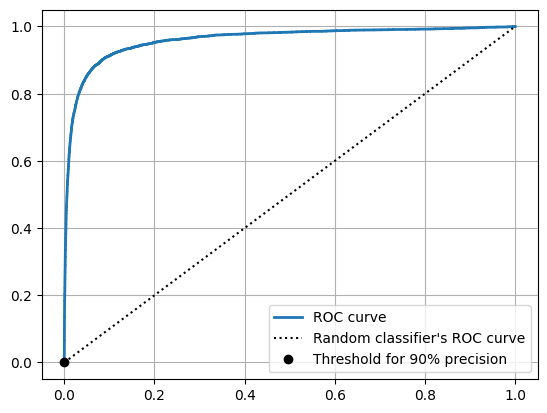

In [96]:
from sklearn.metrics import roc_curve
fpr,tpr,thrs=roc_curve(y_train_5,y_scores)
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")
plt.grid(True)
plt.legend()
plt.show()

#### simple code to display ROC curve

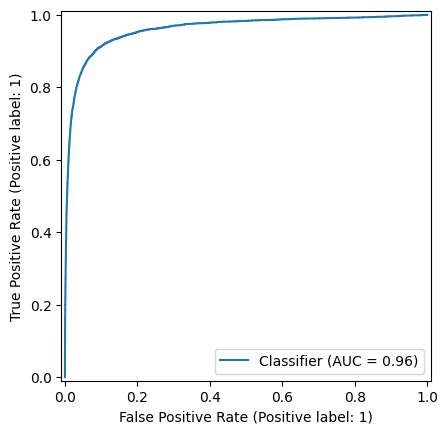

In [97]:
## another simple method to plot  the ROC curve
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_train_5,y_scores)
plt.show()

#### AUC calculation

In [98]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_scores)

0.9604938554008616

In [99]:
from sklearn.ensemble import RandomForestClassifier
rndmfrstreg=RandomForestClassifier(random_state=42)
y_probas_forest=cross_val_predict(rndmfrstreg,X_train,y_train_5,method='predict_proba',cv=3)
y_probas_forest

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       ...,
       [0.02, 0.98],
       [0.92, 0.08],
       [0.94, 0.06]])

In [100]:
y_probas_forest[:5] # returns the prob of (not 5)  and (be 5) for first five predictions 
# 11% chance NOT a 5, 89% chance it IS a 5
# 99% chance NOT a 5, 1% chance it IS a 5
# 96% chance NOT a 5, 4% chance it IS a 5
# 99% chance NOT a 5, 1% chance it IS a 5


array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       [1.  , 0.  ],
       [0.99, 0.01]])

In [101]:
y_train_pred_forest = y_probas_forest[:, 1] >= 0.5  ## chose  the second column to deremine if the number is 5

# Multiclass Classification

### Support vector Machine (SVM)

In [102]:
# if the target values more than two it will work as multi else it  will work as binary classification
from sklearn.svm import SVC
svc_clsf=SVC(random_state=42) ## kernel parameter is the function to increase dimentions (default is rbf)
svc_clsf.fit(X_train[:2000],y_train[:2000]) #this will use automatilcally OVO and will train 45 calssifier 

SVC(random_state=42)

In [103]:
svc_clsf.predict([X_train[3]])[0] #make a prediction on fourth element in the data

'1'

In [104]:
y_train[3] # confirm the prediction on the fourth element in the data

'1'

In [105]:
svc_clsf.decision_function([X_train[3]]).round(2) # returns the score of each class on which the decsion is taken"

array([[-0.29,  9.31,  7.27,  4.83,  3.81,  2.76,  0.73,  7.19,  7.28,
         1.73]])

In [106]:
svc_clsf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

## OVR and OVO (Multiclassification)
#### If you want to force Scikit-Learn to make multi classification we can use the *OneVsOneClassifier* or *OneVsRestClassifier* classes.


OvR (One-Versus-Rest) trains N classifiers (one per class vs. all), making it faster but prone to class imbalance. OvO (One-Versus-One) trains N × (N - 1) / 2 classifiers (each class vs. another), reducing dataset size per classifier but increasing computational cost.

In [107]:
from sklearn.multiclass import OneVsRestClassifier ## for multi
OvsR=OneVsRestClassifier(svc_clsf)
OvsR.fit(X_train[:2000],y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [108]:
print(OvsR.predict([X_train[4]])[0])
print(y_train[4])

9
9


In [109]:
from sklearn.linear_model import SGDClassifier ## for multi
sgd=SGDClassifier(random_state=42,loss='hinge')
sgd.fit(X_train,y_train)

SGDClassifier(random_state=42)

In [110]:
print(sgd.predict([X_train[2]])[0])
print(y_train[2])

4
4


In [111]:
sgd.decision_function([X_train[2]])

array([[-34143.40703505, -21942.13780869,  -4018.29275037,
         -2239.19313075,     43.09419826, -15058.88052383,
        -33653.31059893,  -8277.80610963,  -7460.52016321,
        -14180.15338984]])

In [112]:
acc=cross_val_score(sgd,X_train,y_train,cv=3,scoring='accuracy')


In [113]:
acc

array([0.87365, 0.85835, 0.8689 ])

In [114]:
print(acc.mean())

0.8669666666666668


In [115]:
# scale x_train data to get high accuaracy
from sklearn.preprocessing import StandardScaler
std_sclr=StandardScaler()
X_train_Scaled=std_sclr.fit_transform(X_train.astype('float64'))

In [116]:
acc2=cross_val_score(sgd,X_train_Scaled,y_train,cv=3,scoring='accuracy') ## accuracy after scaling

In [117]:
acc2.mean()

0.8970333333333333

## Error Analysis

#### Confusion Matrix

How to Read the Confusion Matrix:
Axes:

True labels (actual classes) are on the Y-axis (vertical).
Predicted labels (model predictions) are on the X-axis (horizontal).
Diagonal Elements (Green-Yellow Colors):

These represent the correct classifications (where the predicted label matches the true label).
Higher values along the diagonal indicate better model performance.
Off-Diagonal Elements (Purple Colors):

These represent misclassifications (where the model predicted the wrong class).
The further from the diagonal, the worse the misclassification.
Examples from Your Confusion Matrix:

The model correctly classified 5,580 samples as class 0 (top-left).
The model misclassified 223 samples as 8 instead of 0 (row 0, column 8).
The model correctly classified 5,554 samples as class 6.
The number 375 at row 2, column 8 means 375 samples of class 2 were misclassified as class 8.
Color Intensity:

Brighter yellow = higher values (correct classifications).
Darker purple = lower values (misclassifications).

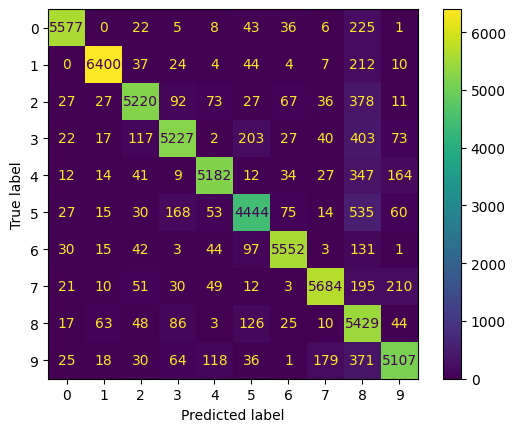

In [118]:
from sklearn.metrics import ConfusionMatrixDisplay
y_train_pred = cross_val_predict(sgd, X_train_Scaled, y_train, cv=3)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

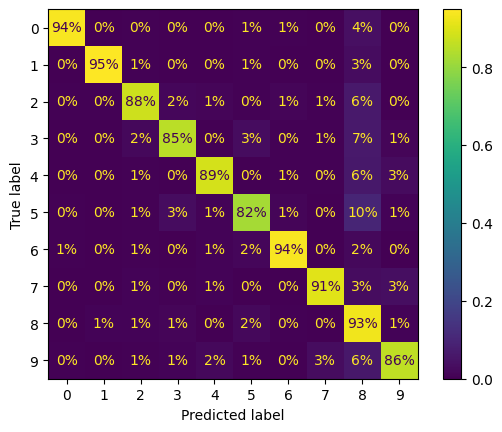

In [119]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,normalize="true", values_format=".0%")
plt.show()

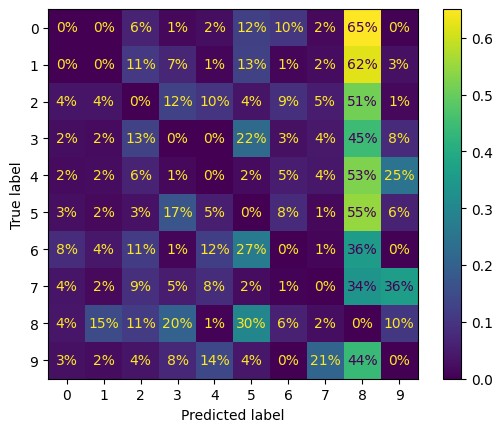

In [120]:
sample_weight = (y_train_pred != y_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,sample_weight=sample_weight, normalize="true", values_format=".0%")
plt.show()

## Multiple Classification 
page 153 -pdf


In [121]:
# instead  of  just claasify the number to its num we created two axis to classify it based on it [large-odd]
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= '7')
y_train_odd = (y_train.astype('int8') % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [122]:
print(y_train[1])
knn_clf.predict([X_train[1]]) 

0


array([[False, False]])

In [123]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.9764102655606048

### Problem:

- You want to predict multiple labels per digit (e.g., "large" and "odd").

- Standard classifiers (like SVM) can’t handle multi-label tasks natively.

- Training separate models ignores dependencies between labels (e.g., "large" digits are more likely to be "odd").

### Solution:
 - ClassifierChain

In [124]:
from sklearn.multioutput import ClassifierChain
chain_clf = ClassifierChain(SVC(), cv=3, random_state=42)
chain_clf.fit(X_train[:2000], y_multilabel[:2000])

ClassifierChain(base_estimator=SVC(), cv=3, random_state=42)

In [125]:
chain_clf.predict([X_train[1]])

array([[0., 0.]])

## Multioutput Classification
page 155 -pdf

| Feature                | Multi-Label Classification                          | Multi-Output Classification                     |
|------------------------|----------------------------------------------------|------------------------------------------------|
| **Definition**         | Predicts multiple binary labels per instance.      | Predicts multiple outputs (mixed types: binary, multiclass, or continuous). |
| **Output Type**        | All labels are binary (`True/False`).              | Outputs can be binary, categorical, or numeric (regression). |
| **Example**           | - A digit is "large" (≥7) **and** "odd".<br>- Image tags: "sunset" + "beach". | - Predict digit class (0-9) **and** odd/even.<br>- Predict plant "species" (class) **and** "height" (numeric). |
| **Problem Structure** | Each instance has multiple binary attributes.      | Each instance has multiple heterogeneous targets. |
| **Scikit-Learn Tools** | `MultiLabelClassifier`, `ClassifierChain`.         | `MultiOutputClassifier`, `MultiOutputRegressor`. |
| **Mathematical Form** | `y ∈ {0,1}^k` (k binary labels).                  | `y ∈ (Y₁ × Y₂ × ... × Yₙ)`, where `Yᵢ` can be any type. |
| **Use Case**          | Tagging systems (e.g., spam + urgent emails).      | Mixed predictions (e.g., class + numeric value). |

#### adding niose

In [ ]:
np.random.seed(42)  # to make this code example reproducible
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

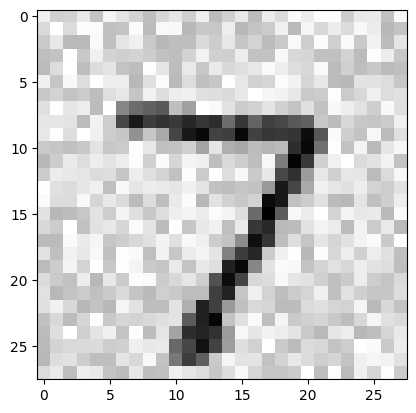

In [133]:
import matplotlib.pyplot as plt
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image,cmap='binary')
    
plot_digit(X_test_mod[0])
plt.show()


#### predicting (removing  noise)

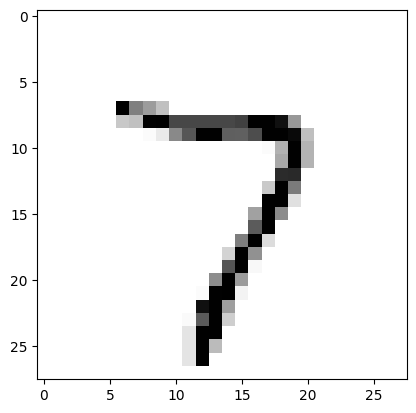

In [132]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[0]])
plot_digit(clean_digit)
plt.show()